In [1]:
# simple time delay model
%matplotlib inline
import math
import copy
import json

N = 20
L = 1
cars = []
for i in range(N):
    # velocity, position, acceleration
    cars.append({
        'v': 0.1/N,
        'x': i/N,
        'b': [0] * 5,
    })

# this is used to control the car that brakes initially
b_length = 20
b_val = 0.011/N
ts = range(20,20+b_length)
bs = [-b_val]*int(b_length/2) + [b_val]*int(b_length/2)
# index of car that brakes
braker = 1

time_series = []
iterations = 200
for i in range(iterations):
    print(i, end='\r')
    # output for plotting
    time_series.append(copy.deepcopy(cars))
    
    for j, car in enumerate(cars):
        cars[j]['x'] = car['x'] + car['v']
        cars[j]['v'] += cars[j]['b'][-1]
        if cars[j]['v'] < 0:
            cars[j]['v'] = 0
            
        # array is used to delay changes in acceleration. car['b'][-1] is the "current" accel value
        cars[j]['b'] = [0] + car['b'][:-1]
        cars[j]['b'][0] = cars[(j+1)%N]['b'][-1]

        # introduce perturbation
        if j == braker and i in ts:
            cars[j]['b'][-1] = bs[i - ts[0]]
            
print('done')

done


In [2]:
# trajectory time series for time delay model
plot_x = []
plot_y = []
trajectories = []

# have to do funky stuff to show periodic BCs correctly
for i in range(5*N):
    trajectories.append([[],[]])
for t,t_x in enumerate(time_series):
    for i,car in enumerate(t_x):
        new_i = i + N*math.floor(car['x'])
        trajectories[new_i][0].append(car['x']%1)
        trajectories[new_i][1].append(t)
    
for traj in trajectories:
    plt.plot(traj[0], traj[1], c='b')
    
plt.rcParams['figure.figsize'] = (25,10)
ax.tick_params(axis='both', which='major', labelsize=24)
plt.ylabel('t', fontsize=20)
plt.xlabel('x', fontsize=20)
# plt.ylim(0,200)
# plt.xlim(0,1)
# plt.savefig('figs/simpletraj.jpg',bbox_inches='tight')

NameError: name 'plt' is not defined

0.0005499999999999999


(0.0, 1.0)

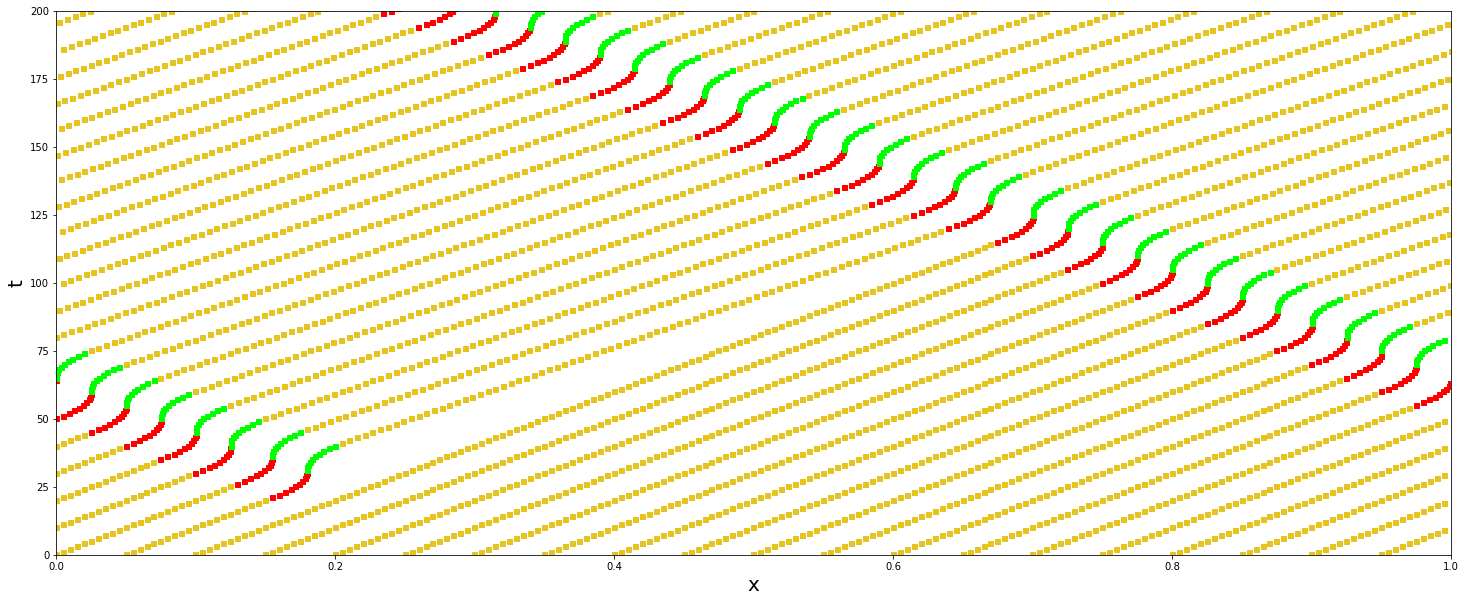

In [376]:
# time delay scatter plot
from matplotlib.colors import LinearSegmentedColormap
colors = [(1, 0, 0), (232/255, 195/255, 32/255), (0, 1, 0)]  # R -> B -> G
cmap = LinearSegmentedColormap.from_list(name='a', colors=colors, N=100)

# color scale normalization. Can use the max accel value or override it custom
max_b = max([max([abs(y['b'][-1]) for y in x]) for x in time_series])
print(max_b)
b_upper_bound = .0001
b_lower_bound = .0001
# b_upper_bound = max_b
# b_lower_bound = max_b

plot_x = []
plot_y = []
plot_c = []
for t,t_x in enumerate(time_series):
    for i,c in enumerate(t_x):
        plot_x.append(c['x']%L)
        plot_y.append(t)
        b_val = (c['b'][-1]+b_lower_bound)/(b_upper_bound*2)
        if b_val > 1:
            plot_c.append(1)
        elif b_val < 0:
            plot_c.append(0)
        else:
            plot_c.append(b_val)
    
plt.rcParams['figure.figsize'] = (25,10)
plt.scatter(plot_x, plot_y, marker='s', c=plot_c, s=25, cmap=cmap)
ax.tick_params(axis='both', which='major', labelsize=24)
plt.ylabel('t', fontsize=20)
plt.xlabel('x', fontsize=20)
# plt.ylim(0,200)
# plt.xlim(0,1)
# plt.savefig('figs/simplescat.jpg',bbox_inches='tight')

0.0005499999999999999


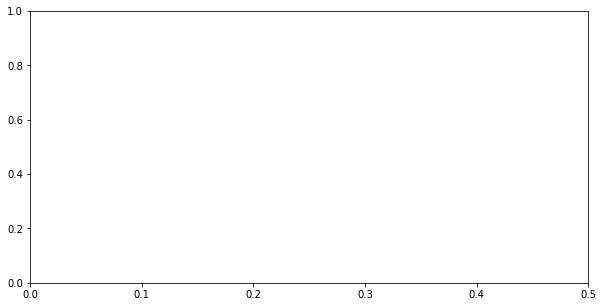

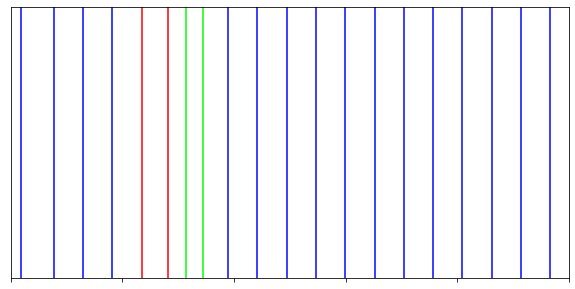

In [2]:
# animation generator
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "html5"
from matplotlib.animation import FuncAnimation
from matplotlib.colors import LinearSegmentedColormap

colors = [(1, 0, 0), (0, 0, 1), (0, 1, 0)]  # R -> B -> G
cmap = LinearSegmentedColormap.from_list(name='a', colors=colors, N=100)

plt.rcParams['figure.figsize'] = (10,5)
plt.xlim([0,0.5])
fig, ax = plt.subplots()

max_b = max([max([abs(y['b'][-1]) for y in x]) for x in time_series])
print(max_b)
b_upper_bound = max_b
b_lower_bound = max_b
def animate(i):
    cars = time_series[i]
    print(i, end='\r')
    ax.clear()
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    for j, car in enumerate(cars):
        global max_b
#         print(j)
        # highlight the braker and color the rest by acceleration
#             if j == braker and cars[j]['b'] == 0 and i < ts[0]:
#                 ax.axvline(x=car['x']%1, color='m')
#             elif cars[j]['b'] > 0:
#                 ax.axvline(x=car['x']%1, color='g')
#             elif cars[j]['b'] < 0:
#                 ax.axvline(x=car['x']%1, color='r')
#             else:
#                 ax.axvline(x=car['x']%1)
#             print(car['b'])
#             print(abs(car['b']) > max_b)
#             print(car['b'])
#             print(max_b)
        if abs(car['b'][-1]) > max_b and not abs(car['b'][-1]) == braker_val:
            max_b = abs(car['b'][-1])

#         if j == 1:
#             ax.axvline(x=car['x']%L, color='m')
#             ax.set_title(car['b'][-1])
#         else:
#             ax.axvline(x=car['x']%L, color=cmap((car['b'][-1]+b_lower_bound)/b_upper_bound*2))

        ax.axvline(x=car['x']%L, color=cmap((car['b'][-1]+b_lower_bound)/(b_upper_bound*2)))
            
ani = FuncAnimation(fig, animate, frames=len(time_series), interval=30)
ani

In [2]:
# bando-hasebe model. Really the main difference is that car['b'] is not an array here
%matplotlib inline
import math
import copy
import json

N = 40
L = 1
cars = []
for i in range(N):
    cars.append({
        'v': 0,
#         'v': 0.002,
#         'v': .003 * L,
        'x': L*i/N,
        'b': 0
    })

# introduce perturbation - change car location
cars[5]['x'] += L*0.5/N

# this is essentially the driver sensitivity. Higher = lower reaction time
a = .14
# this is essentially the speed limit
b = .095

time_series = []
crash = False
stop_on_crash = False
iterations = 600
for i in range(iterations):
    global crash
    if not crash or not stop_on_crash:
        print(i, end='\r')
        time_series.append(copy.deepcopy(cars))

        for j, car in enumerate(cars):
            cars[j]['x'] += car['v']
            cars[j]['v'] += car['b']
            if cars[j]['v'] < 0:
                cars[j]['v'] = 0

            if j+1 == N:
                delta_x = L + cars[0]['x'] - car['x']
            else:
                delta_x = cars[j+1]['x'] - car['x']

            if delta_x < 0:
                crash = True

            cars[j]['b'] = a * (b * math.tanh(delta_x) - car['v'])

if crash:
    print('crash')
print('done')

done


Text(0.5, 0, 'x')

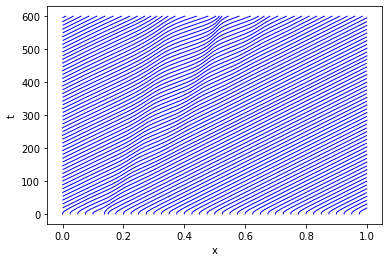

In [3]:
# plot trajectories for bando-hasebe
import matplotlib.pyplot as plt
plot_x = []
plot_y = []
trajectories = []
for i in range(10*N):
    trajectories.append([[],[]])
for t,t_x in enumerate(time_series):
    for i,car in enumerate(t_x):
        new_i = i + N*math.floor(car['x']/L)
        trajectories[new_i][0].append(car['x']%L)
        trajectories[new_i][1].append(t)

for traj in trajectories:
    plt.plot(traj[0], traj[1], c='b', linewidth=1)
    
plt.rcParams['figure.figsize'] = (15,10)
plt.ylabel('t')
plt.xlabel('x')
# plt.ylim(150,300)

0.0004985163423690374


NameError: name 'ax' is not defined

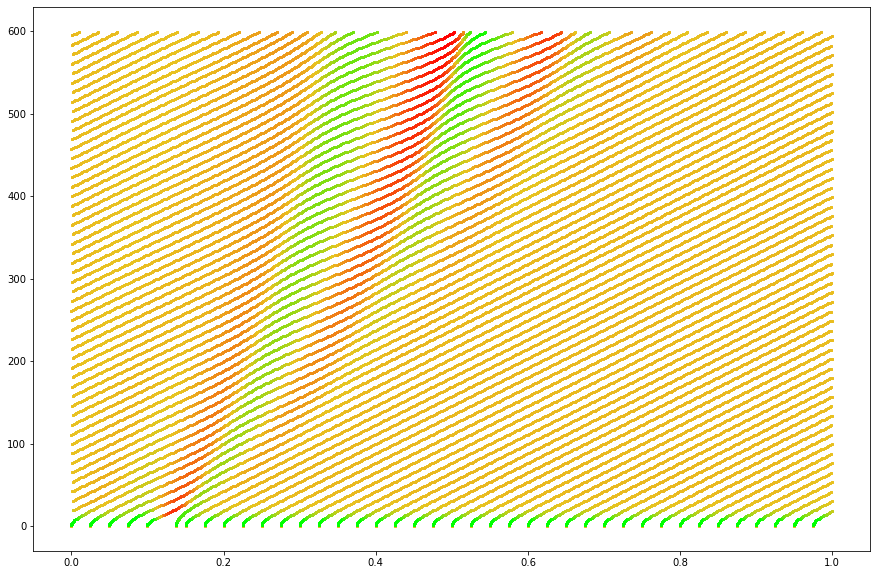

In [12]:
# scatter plot showing accel for bando-hasebe
from matplotlib.colors import LinearSegmentedColormap
colors = [(1, 0, 0), (232/255, 195/255, 32/255), (0, 1, 0)]  # R -> B -> G
cmap = LinearSegmentedColormap.from_list(name='a', colors=colors, N=100)

max_b = max([max([abs(y['b']) for y in x]) for x in time_series])
print(max_b)
b_upper_bound = .0001
b_lower_bound = .0001
# b_upper_bound = max_b
# b_lower_bound = max_b

plot_x = []
plot_y = []
plot_c = []
for t,t_x in enumerate(time_series):
    for i,c in enumerate(t_x):
        plot_x.append(c['x']%L)
        plot_y.append(t)
        b_val = (c['b']+b_lower_bound)/(b_upper_bound*2)
        if b_val > 1:
            plot_c.append(1)
        elif b_val < 0:
            plot_c.append(0)
        else:
            plot_c.append(b_val)
    
plt.rcParams['figure.figsize'] = (15,10)
plt.scatter(plot_x, plot_y, marker='s', c=plot_c, s=4, cmap=cmap)
ax.tick_params(axis='both', which='major', labelsize=25)
plt.ylabel('t', fontsize=19)
plt.xlabel('x', fontsize=19)
# plt.ylim(0,900)
# plt.xlim(0,1)
# plt.savefig('figs/bandoscat.jpg',bbox_inches='tight')

0.0004985163423690374


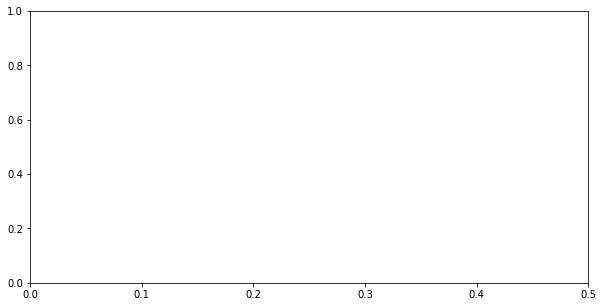

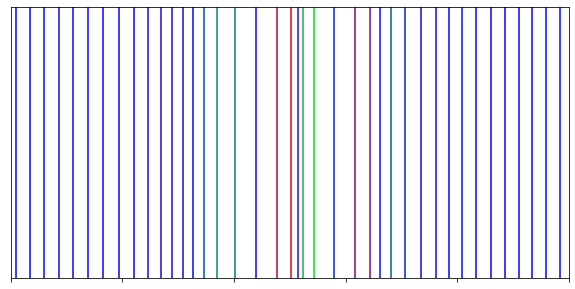

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "html5"
from matplotlib.animation import FuncAnimation
from matplotlib.colors import LinearSegmentedColormap

colors = [(1, 0, 0), (0, 0, 1), (0, 1, 0)]  # R -> B -> G
cmap = LinearSegmentedColormap.from_list(name='a', colors=colors, N=100)

plt.rcParams['figure.figsize'] = (10,5)
plt.xlim([0,0.5])
fig, ax = plt.subplots()

max_b = max([max([abs(y['b']) for y in x]) for x in time_series])
print(max_b)
b_upper_bound = .0001
b_lower_bound = .0001
# b_upper_bound = max_b
# b_lower_bound = max_b
def animate(i):
    cars = time_series[i]
    print(i, end='\r')
    ax.clear()
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    for j, car in enumerate(cars):
        global max_b
        if abs(car['b']) > max_b and not abs(car['b']) == braker_val:
            max_b = abs(car['b'])

#         if j == 3:
#             ax.axvline(x=car['x']%L, color='m')
#             ax.set_title(car['b'])
#         else:
#             ax.axvline(x=car['x']%L, color=cmap((car['b']+b_lower_bound)/b_upper_bound*2))

        ax.axvline(x=car['x']%L, color=cmap((car['b']+b_lower_bound)/(b_upper_bound*2)))
            

ani = FuncAnimation(fig, animate, frames=len(time_series), interval=20)
ani.save('figs/animation2.mp4')

In [9]:
cmap((0+b_lower_bound)/(b_upper_bound*2))

(0.0, 1.0, 0.0, 1.0)

In [ ]:
ani.save('animation1.mp4')

In [2]:
print('_____________')
print('_____________')

# print('b')
print('saving/displaying')
# plt.show()
# ani.save('animation.mp4')
print(time.time() - t1)
with open('time_series.json', 'w') as f:
    json.dump(time_series, f)
# ani

_____________
_____________
saving/displaying
42.81901407241821


In [106]:
# Cellular automata: rule 184
cells = []
N = 300
iterations = 300
for i in range(N):
    # can initialize with even spread or random
#     if i%3 == 0 or i == 76 or i == 74:
    if random.uniform(0, 1) < 0.5:
        cells.append(True)
    else:
        cells.append(False)
        
cell_series = [copy.deepcopy(cells)]
for i in range(iterations):
    cells_old = copy.deepcopy(cells)
    for j, cell in enumerate(cells_old):
        if cells_old[(j-1)]:
            if cells_old[(j+1)%N]:
                cells[j] = True
            elif cell:
                cells[j] = False
            else:
                cells[j] = True
        else:
            if cells_old[(j+1)%N]:
                if cell:
                    cells[j] = True
                else:
                    cells[j] = False
            else:
                cells[j] = False
                
    cell_series.append(copy.deepcopy(cells))

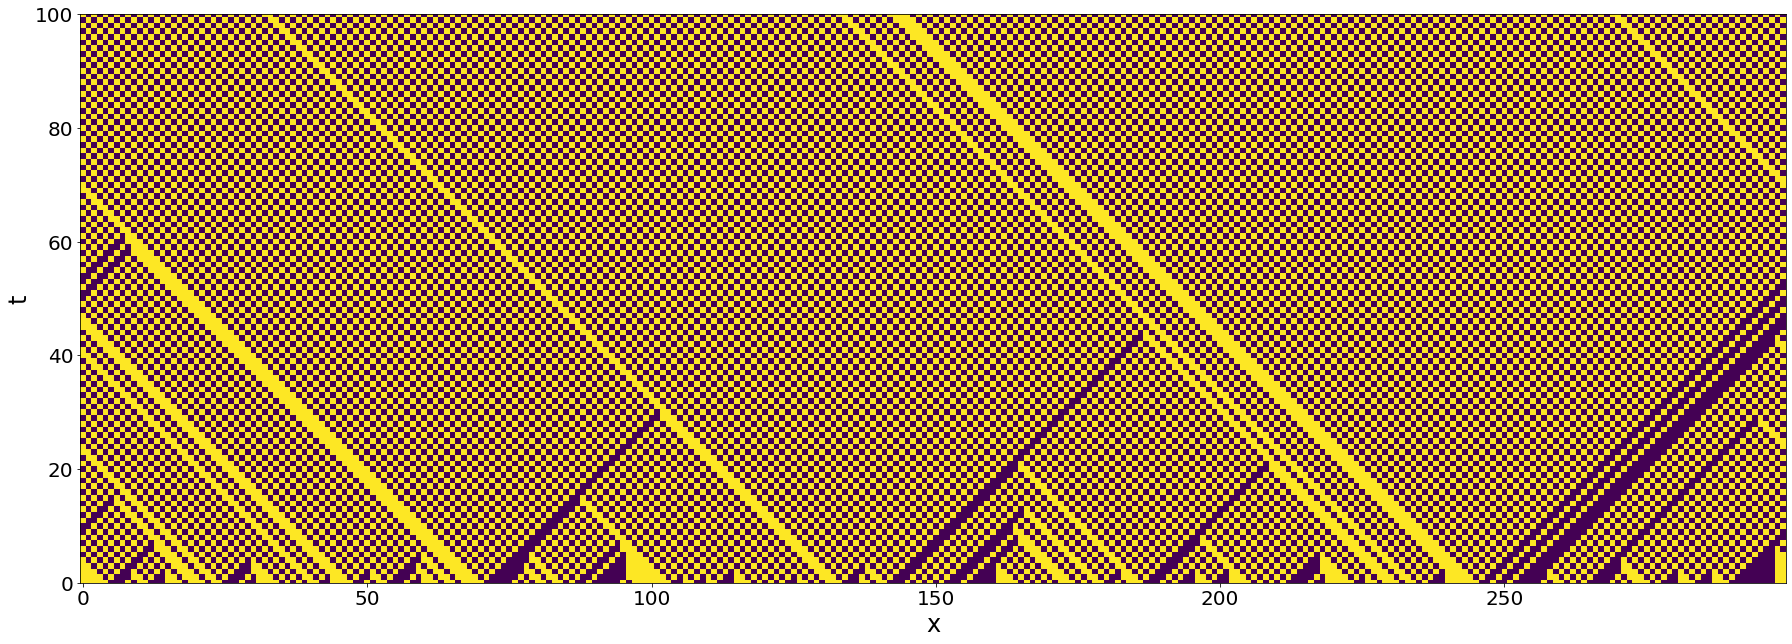

In [110]:
# plotting rule 184 simulations
import matplotlib
import numpy as np

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.imshow(cell_series, interpolation='none')
ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('t', fontsize=24)
plt.xlabel('x', fontsize=24)
# plt.ylim(0,100)
# plt.savefig('figs/rule184jammed.jpg')

In [249]:
# Cellular automata: Nagel-Schreckenberg
import copy
import random

cells = []
L = 300
spacing = 2
iterations = 600
v_max = 5
P = 0.1
for i in range(L):
    # can initialize evenly or randomly
#     if i%spacing == 0:
    if random.uniform(0, 1) < 0.16:
#     if i < 3:
        cells.append(0)
    else:
        cells.append(-1)

# this lets you rerun the model with the same initial state
cells = copy.deepcopy(cells_init)
# cells_init = copy.deepcopy(cells)
        
# outputs number of cars
print(cells.count(0))
cell_series = [copy.deepcopy(cells)]
for i in range(iterations):
    cells_old = copy.deepcopy(cells)
    for j, v in enumerate(cells_old):
        if not v < 0:
            new_v = v
            dx = 0
            k = j+1
            while dx == 0:
                if cells_old[k%L] >= 0:
                    dx = k - j
                k += 1

            if dx > v + 1:
                if v < v_max:
                    new_v += 1
            elif dx < v + 1:
                new_v = dx - 1
            if random.uniform(0, 1) < P and new_v > 0:
                new_v -= 1
                
            cells[j] = -1
            cells[(j + new_v)%L] = new_v
                
    cell_series.append(copy.deepcopy(cells))

print('done')

49
done


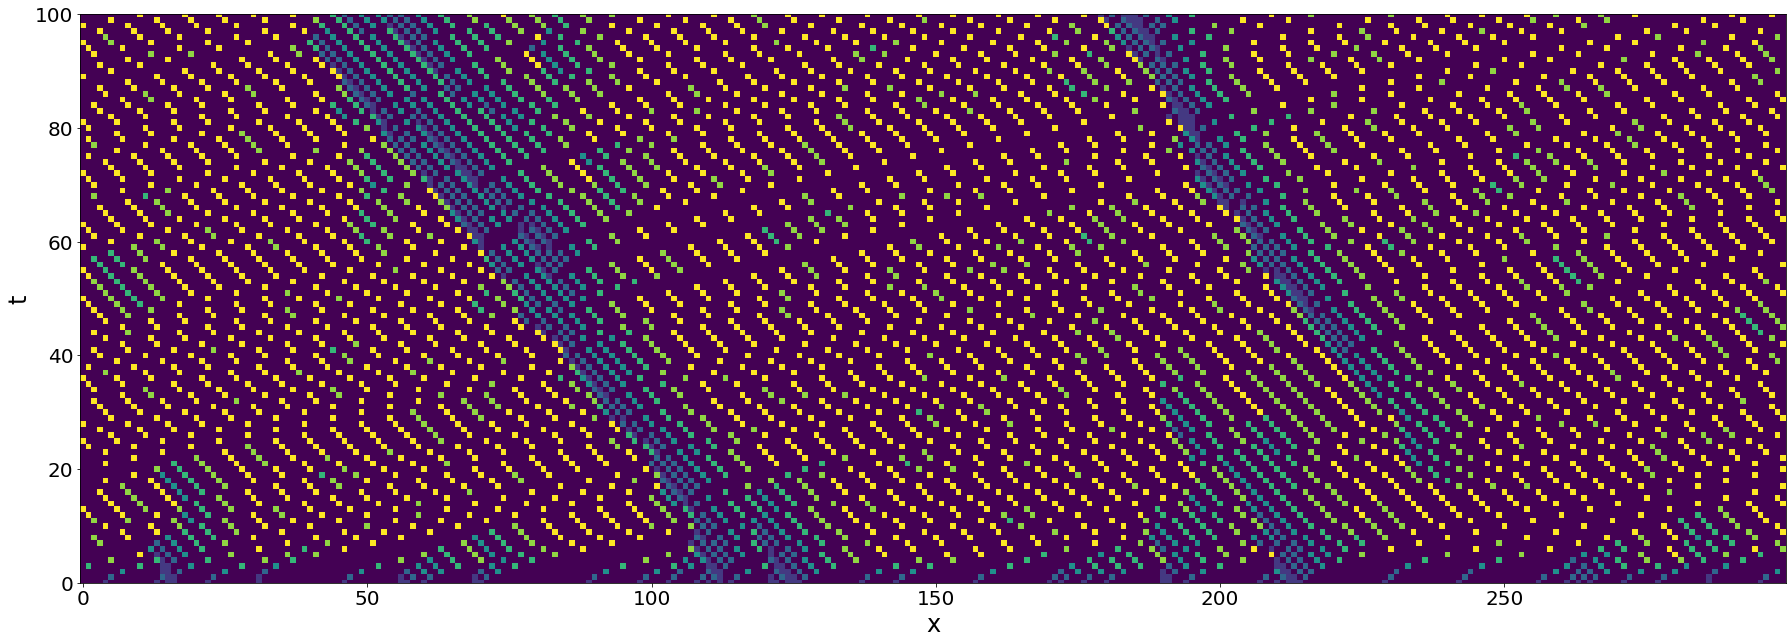

In [250]:
# plotting n-s simulations
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, tight_layout=True)
plt.rcParams['figure.figsize'] = (25,20)
ax.imshow(cell_series, interpolation='none')
ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('t', fontsize=24)
plt.xlabel('x', fontsize=24)
# plt.ylim(0,100)
# plt.savefig('figs/nagelr.jpg')